In [1]:
import impyute as impy
import numpy as np
import pandas as pd
%matplotlib inline

import data_loader
import data_analysis
import model

# xgboost-params
### Load dataset

In [2]:
driver_data = data_loader.get_train_df()

driver_data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [3]:
# replace -1 to nan
driver_data = data_analysis.replace_to_nan(driver_data)
# try to remove rows with missing data
driver_data_not_empty = data_analysis.drop_nan_rows(driver_data, print_stats=True)

Original Length= 595212 	Cleaned Length= 124931 	Missing Data= 470281


Too many incomplete rows - ~79%

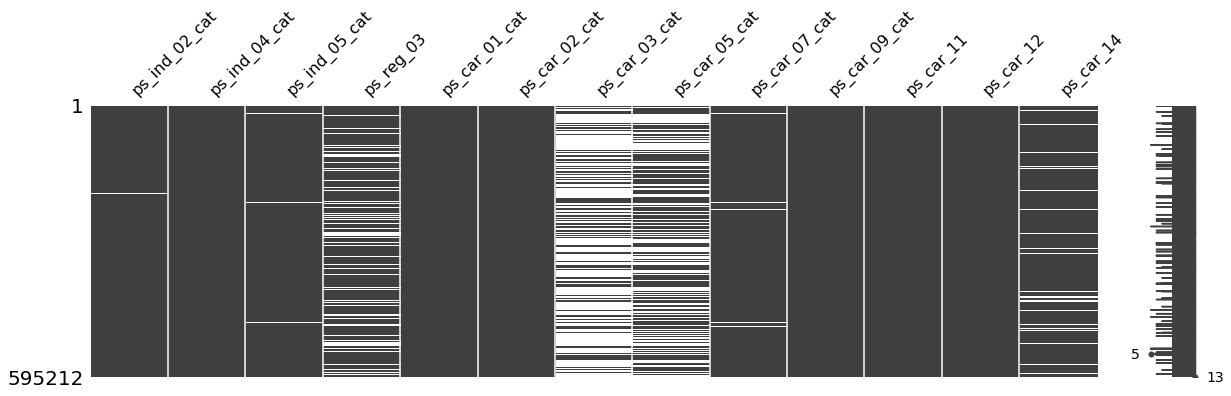

In [4]:
# sparsity matrix
data_analysis.generate_sparsity_matrix(driver_data, print=False, save=False)

Missing mostly *ps_car_03_cat* and *ps_car_05_cat* - to a degree where imput methods will be innacurate

In [5]:
# Check for classes imbalance
data_analysis.check_data_imbalance(driver_data)

target
0    573518
1     21694
dtype: int64
(label 0) percentage: 96.3552482140817%
(label 1) percentage: 3.6447517859182947%
----------------------------------------------------------------


There is need for balance learning dataset hence in *model* we use smote oversampling on learning dataset

In [11]:
driver_data_clean = data_loader.get_train_df().head(80000)
driver_data_clean = driver_data_clean.drop('ps_car_03_cat', axis=1)
driver_data_clean = driver_data_clean.drop('ps_car_05_cat', axis=1)
driver_data_clean = driver_data_clean.drop('ps_reg_03', axis=1)

#driver_data_clean = driver_data_clean.dropna(subset=['target'])
driver_data_clean = driver_data_clean.dropna(axis=0, how='any')

target = driver_data_clean['target']
data = driver_data_clean.drop(['id', 'target'], axis=1)
# prepare dataset
# driver_data_clean = driver_data_clean.head(100000)


k =  1  roc_auc_score =  0.5
k =  2  roc_auc_score =  0.5
k =  3  roc_auc_score =  0.5
k =  4  roc_auc_score =  0.5
avg roc_auc_score =  0.5
